In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longite combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs =zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)
        

608

In [6]:
cities
    
    

['mandiana',
 'nanortalik',
 'dingle',
 'ancud',
 'cape town',
 'marcona',
 'cidreira',
 'illoqqortoormiut',
 'barentsburg',
 'ilulissat',
 'tabulbah',
 'ushuaia',
 'sorland',
 'nantucket',
 'qaanaaq',
 'urtaaul',
 'sinnamary',
 'margate',
 'mantamados',
 'atar',
 'hofn',
 'baleshwar',
 'beyneu',
 'cerna',
 'jamestown',
 'olafsvik',
 'tazovskiy',
 'coihueco',
 'dwarka',
 'piotrkow trybunalski',
 'narsaq',
 'sinjar',
 'ankara',
 'hermanus',
 'olinda',
 'vardo',
 'nabha',
 'bathsheba',
 'gamba',
 'sao jose da coroa grande',
 'vavuniya',
 'formoso do araguaia',
 'mogadishu',
 'busselton',
 'svetlyy yar',
 'saint-jean-port-joli',
 'luderitz',
 'maykain',
 'igurubi',
 'salalah',
 'aasiaat',
 'sao joao da barra',
 'yar-sale',
 'energetik',
 'batavia',
 'antalaha',
 'vikravandi',
 'galabovo',
 'arraial do cabo',
 'jacmel',
 'ribas do rio pardo',
 'attawapiskat',
 'taolanaro',
 'saint-philippe',
 'saldanha',
 'georgetown',
 'babanusah',
 'dikson',
 'shahr-e babak',
 'cheuskiny',
 'camacha',
 '

In [7]:
# Import the requests library.
import requests


In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [10]:
# Create an endpoint URL for a city.
#city_url = url + "&q=" + "Boston"
#print(city_url)

In [11]:
# Make a 'Get' request for the city weather.
#city_weather = requests.get(city_url)
#if city_weather.status_code ==200:
    #print (f"City Weather found.")
#else:
    #print (f"City Weather not found.")

In [12]:
# Get the JSON data.
#boston_data = city_weather.json()

In [13]:
#boston_data

In [14]:
#boston_data["sys"]["country"]

In [15]:
#lat = boston_data["coord"]["lat"]
#lng = boston_data["coord"]["lon"]
#max_temp = boston_data["main"]["temp_max"]
#humidity = boston_data["main"]["humidity"]
#clouds = boston_data["clouds"]["all"]
#wind = boston_data["wind"]["speed"]
#print(lat,lng,max_temp,humidity,clouds,wind)

In [16]:
# Import the datetime module from the datetime library.
import time
from datetime import datetime
# Get the date from the JSON file.
#date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes and seconds.
#datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [17]:
# Create an empty list to hold the weathr data.
city_data =[]

# Print the beginning of the logging.
print("Beginning Data Retrieval       ")
print("-------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | mandiana
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | dingle
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | marcona
City not found. Skipping...
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | tabulbah
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | sorland
Processing Record 14 of Set 1 | nantucket
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | urtaaul
City not found. Skipping...
Processing Record 17 of Set 1 | sinnamary
Processing Record 18 of Set 1 | margate
Processing Record 19 of Set 1 | mantamados
Processing Record 

Processing Record 33 of Set 4 | lisieux
Processing Record 34 of Set 4 | the valley
Processing Record 35 of Set 4 | belyy yar
Processing Record 36 of Set 4 | skagastrond
City not found. Skipping...
Processing Record 37 of Set 4 | penzance
Processing Record 38 of Set 4 | snezhnogorsk
Processing Record 39 of Set 4 | bugiri
Processing Record 40 of Set 4 | kuvandyk
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | luanda
Processing Record 43 of Set 4 | vieques
Processing Record 44 of Set 4 | skibbereen
Processing Record 45 of Set 4 | stromness
Processing Record 46 of Set 4 | bururi
Processing Record 47 of Set 4 | dabhoi
Processing Record 48 of Set 4 | isla mujeres
Processing Record 49 of Set 4 | port-gentil
Processing Record 50 of Set 4 | lyngseidet
Processing Record 1 of Set 5 | camana
Processing Record 2 of Set 5 | mitsamiouli
Processing Record 3 of Set 5 | takoradi
Processing Record 4 of Set 5 | maputo
Processing Record 5 of Set 5 | raudeberg
Processing Record 6 of S

Processing Record 27 of Set 8 | brae
Processing Record 28 of Set 8 | kemijarvi
Processing Record 29 of Set 8 | eyl
Processing Record 30 of Set 8 | bargal
City not found. Skipping...
Processing Record 31 of Set 8 | le port
Processing Record 32 of Set 8 | yarmouth
Processing Record 33 of Set 8 | mana
Processing Record 34 of Set 8 | korla
Processing Record 35 of Set 8 | soyo
Processing Record 36 of Set 8 | saint-francois
Processing Record 37 of Set 8 | verkhnyaya toyma
Processing Record 38 of Set 8 | charlestown
Processing Record 39 of Set 8 | mancio lima
Processing Record 40 of Set 8 | moyale
Processing Record 41 of Set 8 | nouadhibou
Processing Record 42 of Set 8 | leo
Processing Record 43 of Set 8 | meulaboh
Processing Record 44 of Set 8 | chapais
Processing Record 45 of Set 8 | atbasar
Processing Record 46 of Set 8 | volot
Processing Record 47 of Set 8 | pimenta bueno
Processing Record 48 of Set 8 | pandhana
Processing Record 49 of Set 8 | quatre cocos
Processing Record 50 of Set 8 | 

Processing Record 18 of Set 12 | andenes
Processing Record 19 of Set 12 | carutapera
Processing Record 20 of Set 12 | floro
Processing Record 21 of Set 12 | grand-santi
Processing Record 22 of Set 12 | gobabis
Processing Record 23 of Set 12 | santiago
Processing Record 24 of Set 12 | burica
City not found. Skipping...
Processing Record 25 of Set 12 | plettenberg bay
Processing Record 26 of Set 12 | japura
Processing Record 27 of Set 12 | pomoryany
Processing Record 28 of Set 12 | verkh-chebula
Processing Record 29 of Set 12 | krasnyy oktyabr
Processing Record 30 of Set 12 | jaciara
Processing Record 31 of Set 12 | puerto el triunfo
Processing Record 32 of Set 12 | dagana
Processing Record 33 of Set 12 | iberia
Processing Record 34 of Set 12 | toms river
Processing Record 35 of Set 12 | brokopondo
Processing Record 36 of Set 12 | salmas
Processing Record 37 of Set 12 | sarkand
Processing Record 38 of Set 12 | alvaraes
Processing Record 39 of Set 12 | vicuna
Processing Record 40 of Set 1

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


In [19]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mandiana,10.6333,-8.6833,82.04,13,3,4.09,GN,2022-02-12 19:27:35
1,Nanortalik,60.1432,-45.2371,30.40,97,100,6.31,GL,2022-02-12 19:27:35
2,Dingle,10.9995,122.6711,74.43,92,36,8.39,PH,2022-02-12 19:27:36
3,Ancud,-41.8697,-73.8203,79.23,61,84,5.23,CL,2022-02-12 19:27:36
4,Cape Town,-33.9258,18.4232,71.10,81,0,16.11,ZA,2022-02-12 19:25:36
5,Cidreira,-30.1811,-50.2056,78.76,69,1,18.14,BR,2022-02-12 19:27:37
6,Ilulissat,69.2167,-51.1000,24.82,86,75,23.02,GL,2022-02-12 19:27:38
7,Ushuaia,-54.8000,-68.3000,47.86,53,40,37.98,AR,2022-02-12 19:27:38
8,Sorland,67.6670,12.6934,34.97,55,100,12.03,NO,2022-02-12 19:27:38
9,Nantucket,41.2835,-70.0995,55.62,76,0,16.11,US,2022-02-12 19:27:39


In [20]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [21]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mandiana,GN,2022-02-12 19:27:35,10.6333,-8.6833,82.04,13,3,4.09
1,Nanortalik,GL,2022-02-12 19:27:35,60.1432,-45.2371,30.40,97,100,6.31
2,Dingle,PH,2022-02-12 19:27:36,10.9995,122.6711,74.43,92,36,8.39
3,Ancud,CL,2022-02-12 19:27:36,-41.8697,-73.8203,79.23,61,84,5.23
4,Cape Town,ZA,2022-02-12 19:25:36,-33.9258,18.4232,71.10,81,0,16.11
5,Cidreira,BR,2022-02-12 19:27:37,-30.1811,-50.2056,78.76,69,1,18.14
6,Ilulissat,GL,2022-02-12 19:27:38,69.2167,-51.1000,24.82,86,75,23.02
7,Ushuaia,AR,2022-02-12 19:27:38,-54.8000,-68.3000,47.86,53,40,37.98
8,Sorland,NO,2022-02-12 19:27:38,67.6670,12.6934,34.97,55,100,12.03
9,Nantucket,US,2022-02-12 19:27:39,41.2835,-70.0995,55.62,76,0,16.11


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/12/22'

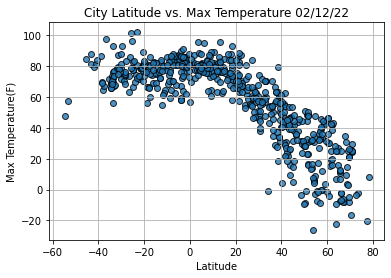

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

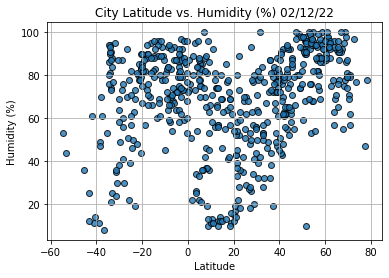

In [26]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

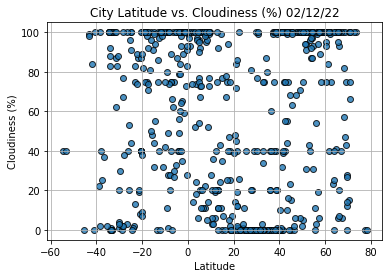

In [27]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

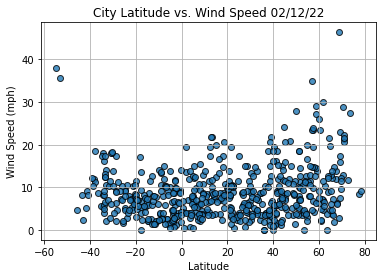

In [28]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [29]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [41]:
# Create a function to perform a linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinate):

    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinate, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [42]:
index13 = city_data_df.loc[13]
index13

City                   Mantamados
Country                        GR
Date          2022-02-12 19:27:41
Lat                       39.3117
Lng                       26.3339
Max Temp                    50.13
Humidity                       74
Cloudiness                    100
Wind Speed                   6.69
Name: 13, dtype: object

In [47]:
# Create Norhtern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

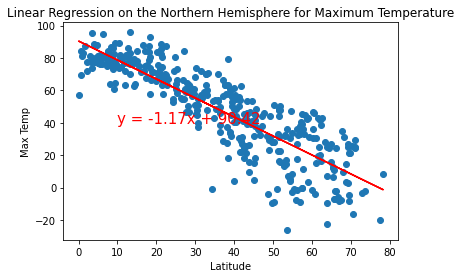

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

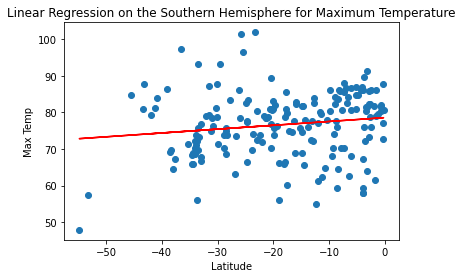

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (10,40))

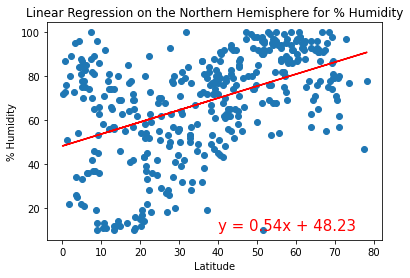

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

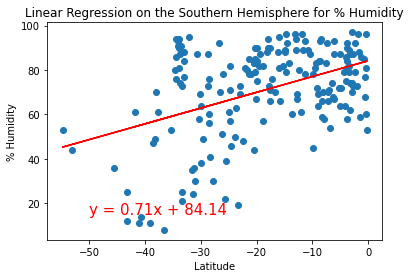

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Humidity", "% Humidity", (-50,15))

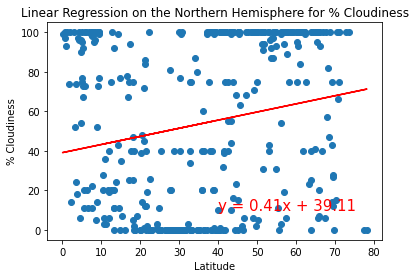

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

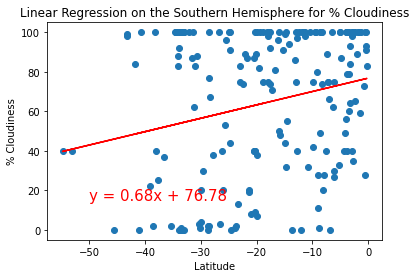

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Cloudiness", "% Cloudiness", (-50,15))

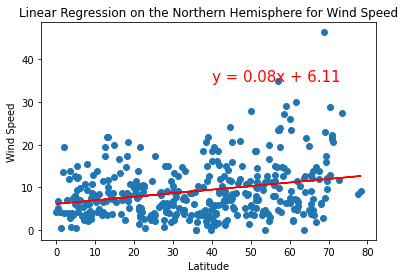

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

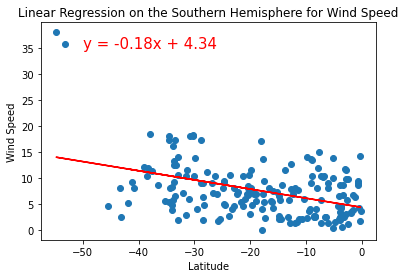

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for Wind Speed", "Wind Speed", (-50,35))